In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)

## Exploratory Data Analysis

In [184]:
print(df.columns)

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N#', 'SerialNumber', 'HasSafetyRec', 'Mode', 'ReportType',
       'OriginalPublishedDate', 'DocketOriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'OnboardInjuryCount', 'OnGroundInjuryCount',
       'ProbableCause', 'Findings', 'EventID', 'Latitude', 'Longitude ',
       'Make', 'Model', 'AirCraftCategory', 'AirportID', 'AirportName',
       'AmateurBuilt', 'NumberOfEngines', 'EngineType', 'Scheduled',
       'PurposeOfFlight', 'FAR', 'AirCraftDamage', 'WeatherCondition',
       'Operator', 'BroadPhaseofFlight', 'ReportStatus', 'RepGenFlag',
       'MostRecentReportType', 'DocketUrl', 'ReportUrl'],
      dtype='object')


In [185]:
# df = df[(df['Country'] == 'United States') & (df['Make'].isin([
#     'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
#     'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
# ]))]

df = df[(df['Country'] == 'United States')]
commercial_makes = [
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
]

df['isCommercial'] = df['Make'].isin(commercial_makes)
df

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,...,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl,isCommercial
1,WPR15CA073,ACC,90556,2015-01-01T17:07:00Z,Yuma,Arizona,United States,NaN,N2841N,13102,...,Substantial,VMC,ROVEY JAMES A,Takeoff,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90556,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
2,ERA15CA093,ACC,90576,2015-01-01T17:30:00Z,Apalachicola,Florida,United States,NaN,N657MC,4622007,...,Substantial,VMC,CHICOLA MONTY V,Taxi,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90576,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
3,ERA15CA089,ACC,90559,2015-01-02T17:40:00Z,Barranquitas,Puerto Rico,United States,NaN,N3183T,11550,...,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90559,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
4,ERA15CA118,ACC,90685,2015-01-02T18:30:00Z,Eustis,Florida,United States,NaN,N516VB,TTS61,...,Substantial,VMC,"Lake Hoppers Air Adventures, Inc.",Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90685,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
5,ERA15FA088,ACC,90558,2015-01-02T18:55:00Z,Kuttawa,Kentucky,United States,NaN,N81291,34-8070037,...,Substantial,IMC,FRO-GUTZ AIR LLC,Enroute,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=90558,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16412,CEN25FA104,ACC,199774,2025-02-27T14:19:00Z,Uvalde,Texas,United States,NaN,N144SG,11880,...,Substantial,VMC,HOLT HELICOPTERS INC,Maneuvering,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
16413,WPR25LA106,ACC,199775,2025-02-27T15:50:00Z,Heber City,Utah,United States,NaN,N345HU,NaN,...,NaN,NaN,BACK COUNTRY N345HU LLC,Landing,In work,NaN,NaN,NaN,NaN,False
16414,ANC25LA021,ACC,199788,2025-02-28T12:00:00Z,Lihue,Hawaii,United States,NaN,N699AV,GA8-06-106,...,Substantial,VMC,AIR VENTURES HAWAII LLC,Taxi,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False
16415,ANC25LA022,ACC,199804,2025-02-28T12:30:00Z,Anchor Point,Alaska,United States,NaN,N3798Z,18-7493,...,Substantial,VMC,NaN,Enroute,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...,False


In [186]:
df = df[['EventDate','FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'HighestInjuryLevel', 'isCommercial']]
df = df[df['isCommercial'] == True]

df['HighestInjuryLevel'] = df['HighestInjuryLevel'].fillna("None")
df

,EventDate,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,HighestInjuryLevel,isCommercial
129,2015-02-15T02:03:00Z,0.0,1.0,4.0,Serious,True
218,2015-03-12T11:00:00Z,0.0,0.0,0.0,None,True
223,2015-03-13T07:15:00Z,0.0,0.0,0.0,None,True
333,2015-04-10T15:00:00Z,0.0,0.0,0.0,None,True
429,2015-05-04T10:45:00Z,0.0,0.0,0.0,None,True
...,...,...,...,...,...,...
16256,2025-01-08T02:40:00Z,NaN,NaN,NaN,None,True
16265,2025-01-10T05:00:00Z,0.0,1.0,6.0,Serious,True
16266,2025-01-10T05:00:00Z,NaN,NaN,NaN,None,True
16362,2025-02-13T05:00:00Z,0.0,1.0,0.0,Serious,True


In [62]:
print(df['EventDate'].max())
print(df['EventDate'].min())

2025-02-24T09:48:00Z
2015-02-15T02:03:00Z


In [63]:
df['HighestInjuryLevel'].isna().sum()

np.int64(0)

In [64]:
df_injuries = df[['EventDate','FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount']]

df_injuries['EventDate'] = pd.to_datetime(df_injuries['EventDate'])
df_injuries.set_index('EventDate', inplace=True)
df_injuries

C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\3515278298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_injuries['EventDate'] = pd.to_datetime(df_injuries['EventDate'])


,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount
EventDate,,,
2015-02-15 02:03:00+00:00,0.0,1.0,4.0
2015-03-12 11:00:00+00:00,0.0,0.0,0.0
2015-03-13 07:15:00+00:00,0.0,0.0,0.0
2015-04-10 15:00:00+00:00,0.0,0.0,0.0
2015-05-04 10:45:00+00:00,0.0,0.0,0.0
...,...,...,...
2025-01-08 02:40:00+00:00,NaN,NaN,NaN
2025-01-10 05:00:00+00:00,0.0,1.0,6.0
2025-01-10 05:00:00+00:00,NaN,NaN,NaN


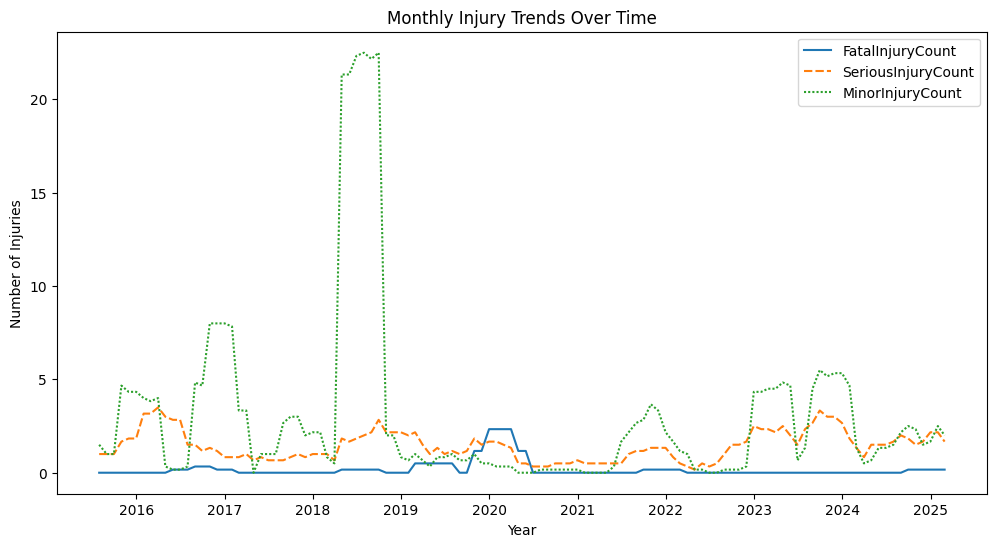

In [179]:
df_inj_resampled = df_injuries.resample('ME').sum()
df_inj_resampled = df_inj_resampled.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_inj_resampled)

plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.title("Monthly Injury Trends Over Time")
plt.legend()
plt.show()

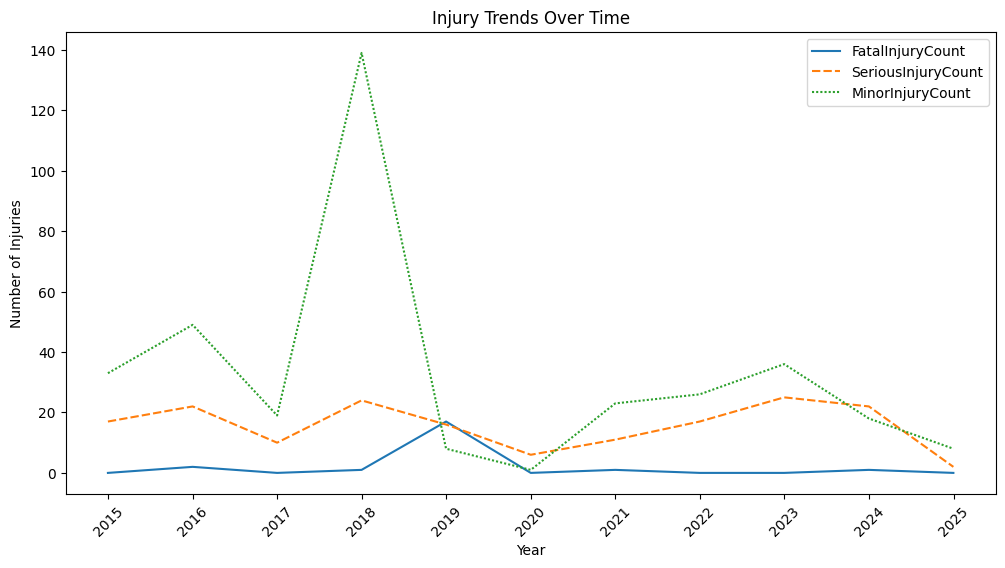

In [180]:
df_inj_resampled = df_injuries.resample('YE').sum()
# df_inj_resampled
# df_inj_resampled = df_inj_resampled.rolling(window=6).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_inj_resampled)

plt.xlabel("Year")
plt.ylabel("Number of Injuries")
plt.title("Injury Trends Over Time")

plt.xticks(pd.date_range(start="2015-12-31", end="2026-12-31", freq='YS').to_pydatetime(), 
           labels=[str(year) for year in range(2015, 2026)], rotation=45)

plt.legend()
plt.show()

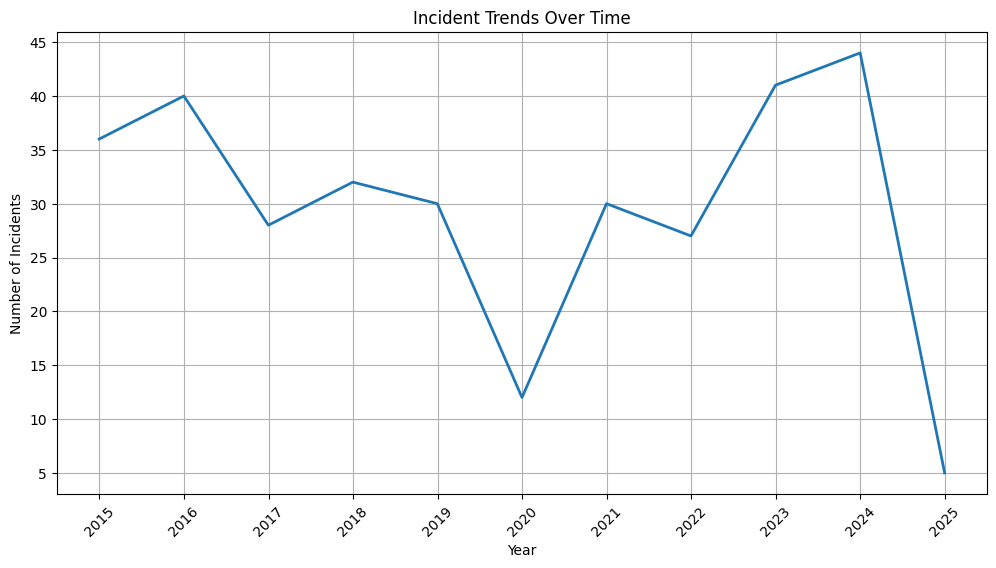

In [174]:
df_sumInc = df
df_sumInc['EventDate'] = pd.to_datetime(df['EventDate'])
df_yearly = df_sumInc.resample('YE', on='EventDate').size()  

plt.figure(figsize=(12, 6))
plt.plot(df_yearly.index, df_yearly, linewidth=2)

plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Incident Trends Over Time")
plt.grid(True)
plt.xticks(pd.date_range(start="2015-12-31", end="2026-12-31", freq='YS').to_pydatetime(), 
           labels=[str(year) for year in range(2015, 2026)], rotation=45)
plt.show()

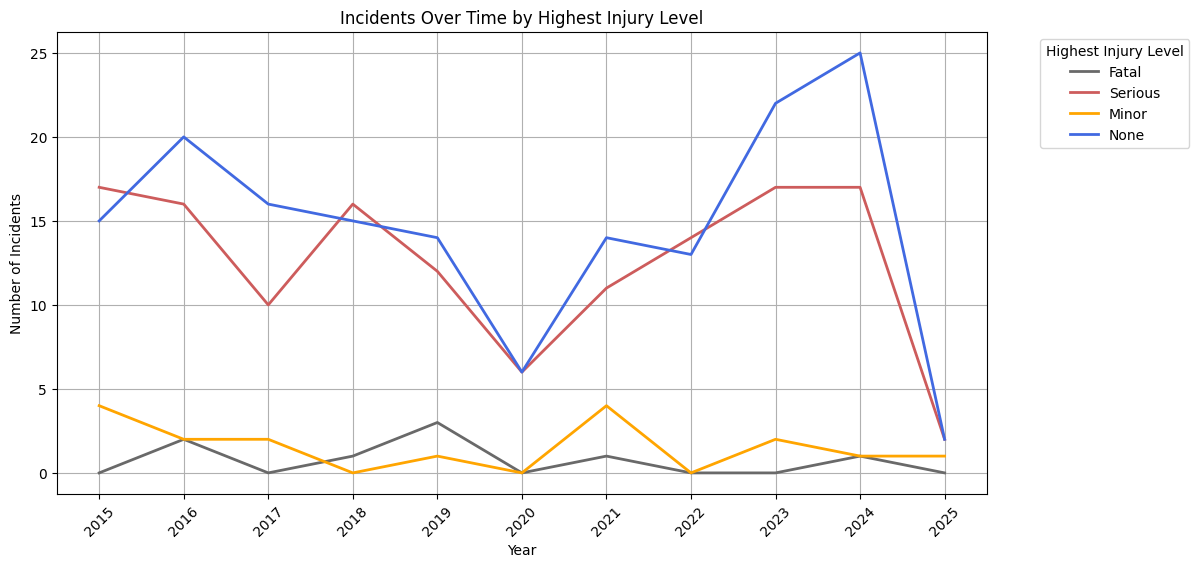

In [178]:
df_highestInc = df
df_highestInc['EventDate'] = pd.to_datetime(df_highestInc['EventDate']) # convert event date to datetime format
df_highestInc['year'] = df_highestInc['EventDate'].dt.year # extract the year

# get cartesian groped of yearsXhighstinjurylevel so that we can fill in rows with 0 incidents
all_years = df_highestInc['year'].unique()
all_levels = df_highestInc['HighestInjuryLevel'].unique()
full_index = pd.MultiIndex.from_product([all_years, all_levels], names=['year', 'HighestInjuryLevel'])

# group by year and count number of incidents per injury level
df_highestInc_grouped = df_highestInc.groupby(['year','HighestInjuryLevel']).size().reset_index(name='incidentCount').set_index(['year', 'HighestInjuryLevel']) # group by injury level and count number of incidents
df_highestInc_grouped_full = df_highestInc_grouped.reindex(full_index, fill_value=0).reset_index()


colors = {
    'Fatal': 'dimgrey',
    'Serious': 'indianred',
    'Minor': 'orange',
    'None': 'royalblue',
}


plt.figure(figsize=(12, 6))
sns.lineplot(data=df_highestInc_grouped_full, x='year', y='incidentCount', hue='HighestInjuryLevel', palette=colors, linewidth=2,  hue_order=['Fatal', 'Serious', 'Minor', 'None'])

# Customize plot
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Incidents Over Time by Highest Injury Level")
plt.xticks(rotation=45) 
plt.xticks(range(2015,2026))
# plt.xlim(2015,2025)
plt.legend(title="Highest Injury Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)

# Show plot
plt.show()

In [140]:
df_cumInc = df

df_cumInc['EventDate'] = pd.to_datetime(df['EventDate'])
df_cumInc['year'] = df['EventDate'].dt.year
df_cumInc['dayOfYear'] = df['EventDate'].dt.dayofyear

df_grouped = df_cumInc.groupby(['year','dayOfYear']).size().reset_index(name='incidentCount')
# df_grouped['cumulativeIncidents'] = df_grouped.groupby('year')['incidentCount'].cumsum()

# create an index for every (year, dayOfYear) combination
full_index = []
for year in df_grouped['year'].unique():
    max_day = 366 if pd.Timestamp(f"{year}-12-31").is_leap_year else 365
    full_index.extend([(year, day) for day in range(1, max_day + 1)])

# fill in missing days
df_full = pd.DataFrame(full_index, columns=['year', 'dayOfYear'])
df_merged = pd.merge(df_full, df_grouped, on=['year', 'dayOfYear'], how='left')
df_merged['incidentCount'] = df_merged['incidentCount'].fillna(0)

# Compute cumulative incidents per year
df_merged['cumulativeIncidents'] = df_merged.groupby('year')['incidentCount'].cumsum()



df_merged

,year,dayOfYear,incidentCount,cumulativeIncidents
0,2015,1,0.0,0.0
1,2015,2,0.0,0.0
2,2015,3,0.0,0.0
3,2015,4,0.0,0.0
4,2015,5,0.0,0.0
...,...,...,...,...
4013,2025,361,0.0,5.0
4014,2025,362,0.0,5.0
4015,2025,363,0.0,5.0
4016,2025,364,0.0,5.0


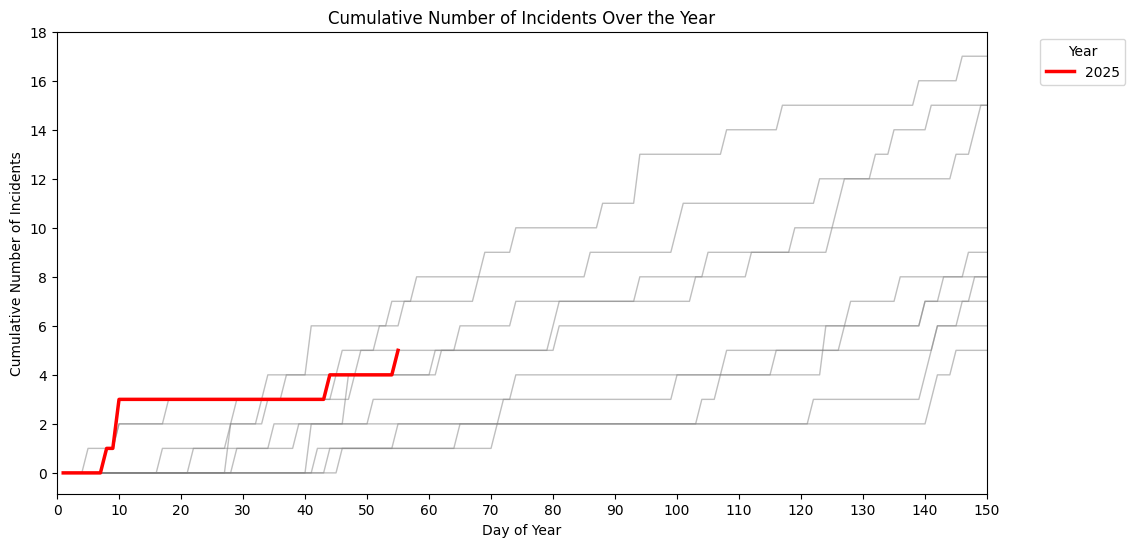

In [181]:
plt.figure(figsize=(12, 6))



for year in range(2015, 2026): 
    # yearly_data = df_merged[df_merged['year'] == year]

    
    yearly_data = df_merged[(df_merged['year'] == year) & (df_merged['dayOfYear'] <= 150)]
    # yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()

    if year == 2025:
        yearly_data = yearly_data[yearly_data['dayOfYear'] <= 55]
        plt.plot(yearly_data['dayOfYear'], yearly_data['cumulativeIncidents'], label=str(year), color='red', linewidth=2.5)
    else:
        plt.plot(yearly_data['dayOfYear'], yearly_data['cumulativeIncidents'], color='gray', linewidth=1, alpha=0.5)

# Customize plot
plt.xlabel("Day of Year")
plt.ylabel("Cumulative Number of Incidents")
plt.yticks(range(0,20,2))
plt.xticks(range(0,151,10))
plt.xlim(0,150)
plt.title("Cumulative Number of Incidents Over the Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left") 
# plt.grid(True)
plt.show()

C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1721523630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1721523630.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1721523630.py:10: SettingWit

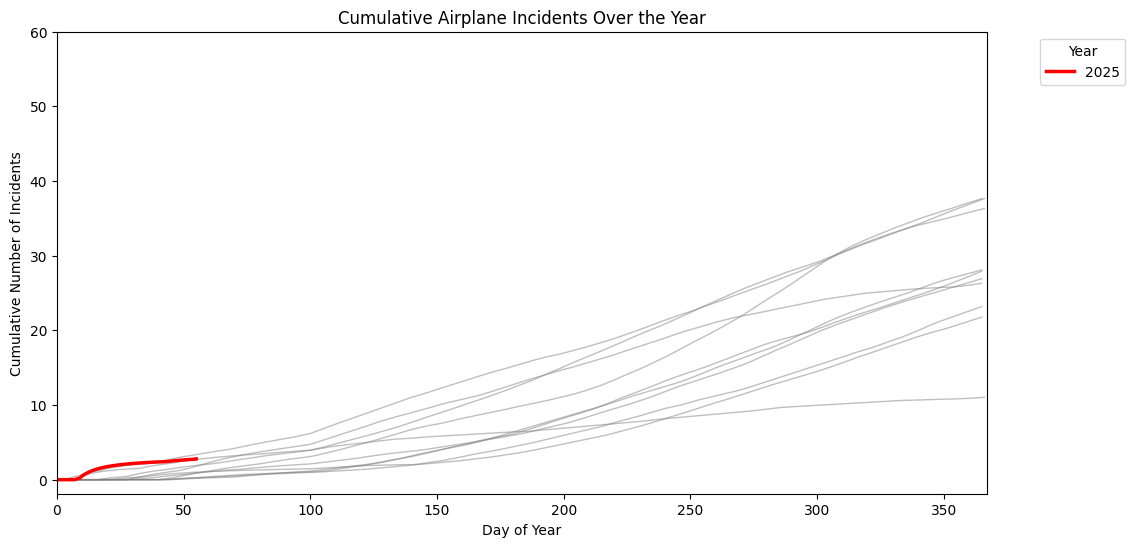

In [117]:
plt.figure(figsize=(12, 6))



for year in range(2015, 2026): 
    yearly_data = df_merged[df_merged['year'] == year]

    
    # yearly_data = df_merged[(df_merged['year'] == year) & (df_merged['dayOfYear'] <= 150)]
    yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
 
    if year == 2025:
        yearly_data = yearly_data[yearly_data['dayOfYear'] <= 55]
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], label=str(year), color='red', linewidth=2.5)
    else:
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], color='gray', linewidth=1, alpha=0.5)

# Customize plot
plt.xlabel("Day of Year")
plt.ylabel("Cumulative Number of Incidents")
plt.yticks(range(0,61,10))
plt.xticks(range(0,367,50))
plt.xlim(0,367)
plt.title("Cumulative Airplane Incidents Over the Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left") 
# plt.grid(True)
plt.show()

C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1238767230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1238767230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
C:\Users\Loraw\AppData\Local\Temp\ipykernel_27484\1238767230.py:10: SettingWit

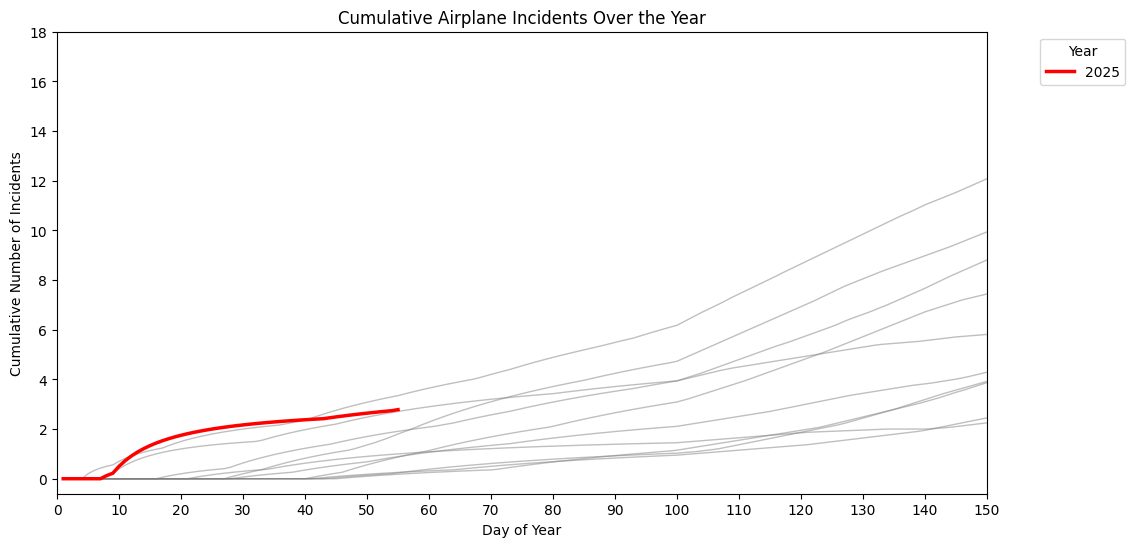

In [123]:
plt.figure(figsize=(12, 6))



for year in range(2015, 2026): 
    # yearly_data = df_merged[df_merged['year'] == year]

    
    yearly_data = df_merged[(df_merged['year'] == year) & (df_merged['dayOfYear'] <= 150)]
    yearly_data['smoothed'] = yearly_data['cumulativeIncidents'].rolling(window=100, min_periods=1).mean()
 
    if year == 2025:
        yearly_data = yearly_data[yearly_data['dayOfYear'] <= 55]
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], label=str(year), color='red', linewidth=2.5)
    else:
        plt.plot(yearly_data['dayOfYear'], yearly_data['smoothed'], color='gray', linewidth=1, alpha=0.5)

# Customize plot
plt.xlabel("Day of Year")
plt.ylabel("Cumulative Number of Incidents")
plt.yticks(range(0,20,2))
plt.xticks(range(0,151,10))
plt.xlim(0,150)
plt.title("Cumulative Airplane Incidents Over the Year")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left") 
# plt.grid(True)
plt.show()

## MACHINE LEARNING ANALYSIS

In [281]:
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)
df.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'ReportNo', 'N#', 'SerialNumber', 'HasSafetyRec', 'Mode', 'ReportType',
       'OriginalPublishedDate', 'DocketOriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'OnboardInjuryCount', 'OnGroundInjuryCount',
       'ProbableCause', 'Findings', 'EventID', 'Latitude', 'Longitude ',
       'Make', 'Model', 'AirCraftCategory', 'AirportID', 'AirportName',
       'AmateurBuilt', 'NumberOfEngines', 'EngineType', 'Scheduled',
       'PurposeOfFlight', 'FAR', 'AirCraftDamage', 'WeatherCondition',
       'Operator', 'BroadPhaseofFlight', 'ReportStatus', 'RepGenFlag',
       'MostRecentReportType', 'DocketUrl', 'ReportUrl'],
      dtype='object')

In [364]:
df = pd.read_csv('Merged10yrdata.csv', low_memory=False)

# categorize incidents by make (Airbus and Boeing only)
commercial_makes = [
    'BOEING', 'Airbus', 'Boeing', 'AIRBUS', 
    'AIRBUS INDUSTRIE', 'BOEING, AIRBUS', 'AIRBUS SAS'
]
df['isCommercial'] = df['Make'].isin(commercial_makes)

# convert date to month
df['EventDate'] = pd.to_datetime(df['EventDate'])
df['Month'] = df['EventDate'].dt.month

# convert weather condition to something more readable


# filter out unnecessary columns
df = df[(df['Country'] == 'United States') & df['isCommercial'] == True]
df = df[['EventDate', 'Latitude', 'Longitude ', 'City', 'State', 'WeatherCondition', 'BroadPhaseofFlight', 'Make', 'Month', 'HighestInjuryLevel']]


# fill in blank injury level columns with None
df['HighestInjuryLevel'] = df['HighestInjuryLevel'].fillna("None")


df

,EventDate,Latitude,Longitude,City,State,WeatherCondition,BroadPhaseofFlight,Make,Month,HighestInjuryLevel
129,2015-02-15 02:03:00+00:00,22.608888,-153.843048,HONOLULU,Pacific Ocean,IMC,Enroute,BOEING,2,Serious
218,2015-03-12 11:00:00+00:00,41.412498,-78.502502,St Marys,Pennsylvania,VMC,Landing,BOEING,3,None
223,2015-03-13 07:15:00+00:00,61.228610,-150.870834,Anchorage,Alaska,VMC,Enroute,AIRBUS,3,None
333,2015-04-10 15:00:00+00:00,34.597499,-117.383056,Victorville,California,VMC,Enroute,BOEING,4,None
429,2015-05-04 10:45:00+00:00,46.251667,-114.125550,Hamilton,Montana,VMC,Emergency Descent,AIRBUS,5,None
...,...,...,...,...,...,...,...,...,...,...
16256,2025-01-08 02:40:00+00:00,NaN,NaN,Los Angeles,California,NaN,Approach,BOEING,1,None
16265,2025-01-10 05:00:00+00:00,NaN,NaN,Atlanta,Georgia,NaN,Takeoff,BOEING,1,Serious
16266,2025-01-10 05:00:00+00:00,NaN,NaN,San Bernadino,California,NaN,Landing,BOEING,1,None
16362,2025-02-13 05:00:00+00:00,NaN,NaN,San Francisco,California,NaN,Enroute,BOEING,2,Serious


In [204]:
!pip install meteostat


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [303]:
from datetime import datetime
from meteostat import Point, Hourly, Stations

In [359]:
row = df.iloc[1]
print(row['City'])
# Define location (e.g., New York City)
location = Point(row['Latitude'], row['Longitude ']) # Use lat/lon for accuracy
location.radius = 50000

time = row['EventDate'].tz_localize(None)

# # Get hourly historical weather data
weather_data = Hourly(location, time, time + pd.Timedelta(hours=1))
data = weather_data.fetch()
print(data)

# columns
# precipitation = data['prcp'].iloc[0]
# windSpeed = data['wspd'].iloc[0]
# weatherCode = data['coco'].iloc[0]


St Marys
                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres  \
time                                                                           
2015-03-12 11:00:00  -1.7  -8.2  61.0   0.0   NaN   20.0   7.6   NaN  1031.5   
2015-03-12 12:00:00  -1.7  -8.2  61.0   0.0   NaN  360.0  11.2   NaN  1032.7   

                     tsun  coco  
time                             
2015-03-12 11:00:00   NaN   NaN  
2015-03-12 12:00:00   NaN   NaN  


In [365]:
import warnings
warnings.simplefilter('ignore')

def fetch_weather(row):
    ts = row['EventDate'].tz_localize(None)
    location = Point(row['Latitude'], row['Longitude '])
    location.radius = 100000
    weather_data = Hourly(location, ts, ts + pd.Timedelta(hours=1)).fetch()

    if weather_data.empty:
        return pd.Series([None, None, None])
    else:
        return pd.Series([weather_data['prcp'].iloc[0], weather_data['wspd'].iloc[0], weather_data['coco'].iloc[0]])

In [367]:
df_weather = df
df_weather[['precip', 'windSpeed', 'weatherCode']] = df_weather.apply(fetch_weather, axis=1)
df_weather

,EventDate,Latitude,Longitude,City,State,WeatherCondition,BroadPhaseofFlight,Make,Month,HighestInjuryLevel,precip,windSpeed,weatherCode
129,2015-02-15 02:03:00+00:00,22.608888,-153.843048,HONOLULU,Pacific Ocean,IMC,Enroute,BOEING,2,Serious,NaN,NaN,NaN
218,2015-03-12 11:00:00+00:00,41.412498,-78.502502,St Marys,Pennsylvania,VMC,Landing,BOEING,3,None,0.0,7.6,NaN
223,2015-03-13 07:15:00+00:00,61.228610,-150.870834,Anchorage,Alaska,VMC,Enroute,AIRBUS,3,None,0.0,29.5,NaN
333,2015-04-10 15:00:00+00:00,34.597499,-117.383056,Victorville,California,VMC,Enroute,BOEING,4,None,0.0,5.4,NaN
429,2015-05-04 10:45:00+00:00,46.251667,-114.125550,Hamilton,Montana,VMC,Emergency Descent,AIRBUS,5,None,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16256,2025-01-08 02:40:00+00:00,NaN,NaN,Los Angeles,California,NaN,Approach,BOEING,1,None,NaN,NaN,NaN
16265,2025-01-10 05:00:00+00:00,NaN,NaN,Atlanta,Georgia,NaN,Takeoff,BOEING,1,Serious,NaN,NaN,NaN
16266,2025-01-10 05:00:00+00:00,NaN,NaN,San Bernadino,California,NaN,Landing,BOEING,1,None,NaN,NaN,NaN
16362,2025-02-13 05:00:00+00:00,NaN,NaN,San Francisco,California,NaN,Enroute,BOEING,2,Serious,NaN,NaN,NaN


In [369]:
df_weather['precip'].isna().sum()

np.int64(37)

In [371]:
df_weather['weatherCode'].isna().sum()

np.int64(112)

In [376]:
df_weather = df_weather.dropna(subset=['weatherCode'])
df_weather

,EventDate,Latitude,Longitude,City,State,WeatherCondition,BroadPhaseofFlight,Make,Month,HighestInjuryLevel,precip,windSpeed,weatherCode
1480,2015-11-29 18:15:00+00:00,38.629608,-90.240516,St Louis,Missouri,IMC,Enroute,BOEING,11,Serious,0.0,14.8,7.0
1560,2015-12-23 02:16:00+00:00,35.285831,-80.821388,Charlotte,North Carolina,IMC,Approach,BOEING,12,Serious,0.3,9.4,7.0
2029,2016-05-05 14:05:00+00:00,58.479999,-134.208892,Juneau,Alaska,VMC,Approach,AIRBUS,5,Serious,1.3,13.0,7.0
2038,2016-05-06 19:00:00+00:00,59.450279,-135.205551,Skagway,Alaska,IMC,Enroute,AIRBUS,5,Fatal,1.3,0.0,7.0
2081,2016-05-14 19:00:00+00:00,39.874443,-75.241943,Philadelphia,Pennsylvania,Unknown,Approach,AIRBUS INDUSTRIE,5,Serious,0.0,31.7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15924,2024-10-05 15:10:00+00:00,36.080044,-115.152230,Las Vegas,Nevada,VMC,Enroute,AIRBUS,10,None,0.0,5.4,2.0
16003,2024-10-21 11:00:00+00:00,33.201961,-97.199097,Denton,Texas,VMC,Initial Climb,BOEING,10,None,0.0,0.0,1.0
16004,2024-10-21 14:08:00+00:00,37.239960,-76.718454,Williamsburg,Virginia,VMC,Landing,BOEING,10,None,0.0,0.0,1.0
16111,2024-11-18 17:30:00+00:00,38.434006,-82.410832,Huntington,West Virginia,VMC,Enroute,BOEING,11,None,0.0,5.4,3.0


In [382]:
print(df_weather['BroadPhaseofFlight'].unique())
print(df_weather['Make'].unique())
print(df_weather['HighestInjuryLevel'].unique())

['Enroute' 'Approach' 'Initial Climb' 'Landing' 'Standing' 'Pushback/Tow'
 'Takeoff' 'Taxi' 'Maneuvering']
['BOEING' 'AIRBUS' 'AIRBUS INDUSTRIE' 'Airbus' 'Boeing' 'AIRBUS SAS']
['Serious' 'Fatal' 'None' 'Minor']


In [380]:
df_weather = df_weather[df_weather['Make'] != 'BOEING, AIRBUS']

In [588]:
# map columns to numerical values because they can't be categorial
phase_mapping = {
    'Enroute': 0,
    'Approach': 1,
    'Initial Climb': 2,
    'Landing': 3,
    'Standing': 4,
    'Pushback/Tow': 5,
    'Takeoff': 6,
    'Taxi': 7,
    'Maneuvering': 8
}

make_mapping = {
    'BOEING': 0,
    'Boeing': 0,
    'AIRBUS': 1,
    'AIRBUS INDUSTRIE': 1,
    'Airbus': 1,
    'AIRBUS SAS': 1
}

injury_mapping = {
    'Fatal': 0,
    'Serious': 1,
    'Minor': 2,
    'None': 3,
}

weather_code_map = {
    1: "Clear",
    2: "Fair",
    3: "Cloudy",
    4: "Overcast",
    5: "Fog",
    6: "Freezing Fog",
    7: "Light Rain",
    8: "Rain",
    9: "Heavy Rain",
    10: "Freezing Rain",
    11: "Heavy Freezing Rain",
    12: "Sleet",
    13: "Heavy Sleet",
    14: "Light Snowfall",
    15: "Snowfall",
    16: "Heavy Snowfall",
    17: "Rain Shower",
    18: "Heavy Rain Shower",
    19: "Sleet Shower",
    20: "Heavy Sleet Shower",
    21: "Snow Shower",
    22: "Heavy Snow Shower",
    23: "Lightning",
    24: "Hail",
    25: "Thunderstorm",
    26: "Heavy Thunderstorm",
    27: "Storm"
}

df_weather['flightPhase'] = df['BroadPhaseofFlight'].map(phase_mapping)
df_weather['make'] = df['Make'].map(make_mapping)
df_weather['injuryLevel'] = df['HighestInjuryLevel'].map(injury_mapping)
df_weather['weatherDescription'] = df_weather['weatherCode'].map(weather_code_map)

df_weather

,EventDate,Latitude,Longitude,City,State,WeatherCondition,BroadPhaseofFlight,Make,Month,HighestInjuryLevel,precip,windSpeed,weatherCode,flightPhase,make,injuryLevel,weatherDescription
1480,2015-11-29 18:15:00+00:00,38.629608,-90.240516,St Louis,Missouri,IMC,Enroute,BOEING,11,Serious,0.0,14.8,7.0,0.0,0.0,1,Light Rain
1560,2015-12-23 02:16:00+00:00,35.285831,-80.821388,Charlotte,North Carolina,IMC,Approach,BOEING,12,Serious,0.3,9.4,7.0,1.0,0.0,1,Light Rain
2029,2016-05-05 14:05:00+00:00,58.479999,-134.208892,Juneau,Alaska,VMC,Approach,AIRBUS,5,Serious,1.3,13.0,7.0,1.0,1.0,1,Light Rain
2038,2016-05-06 19:00:00+00:00,59.450279,-135.205551,Skagway,Alaska,IMC,Enroute,AIRBUS,5,Fatal,1.3,0.0,7.0,0.0,1.0,0,Light Rain
2081,2016-05-14 19:00:00+00:00,39.874443,-75.241943,Philadelphia,Pennsylvania,Unknown,Approach,AIRBUS INDUSTRIE,5,Serious,0.0,31.7,7.0,1.0,1.0,1,Light Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15924,2024-10-05 15:10:00+00:00,36.080044,-115.152230,Las Vegas,Nevada,VMC,Enroute,AIRBUS,10,None,0.0,5.4,2.0,0.0,1.0,3,Fair
16003,2024-10-21 11:00:00+00:00,33.201961,-97.199097,Denton,Texas,VMC,Initial Climb,BOEING,10,None,0.0,0.0,1.0,2.0,0.0,3,Clear
16004,2024-10-21 14:08:00+00:00,37.239960,-76.718454,Williamsburg,Virginia,VMC,Landing,BOEING,10,None,0.0,0.0,1.0,3.0,0.0,3,Clear
16111,2024-11-18 17:30:00+00:00,38.434006,-82.410832,Huntington,West Virginia,VMC,Enroute,BOEING,11,None,0.0,5.4,3.0,0.0,0.0,3,Cloudy


In [463]:
# check if classes are imbalanced
df_weather['HighestInjuryLevel'].value_counts()

HighestInjuryLevel
None       88
Serious    74
Fatal       7
Minor       7
Name: count, dtype: int64

# Decision Tree

Goal: predict the highest injury level if an incident were to occur based on certain 
flight conditions: phase of flight, weather, time of year, and make of aircraft (Boeing or Airbus)

The purpose of this model is to identify conditions that are more likely to result in serious or fatal injuries.

In [412]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

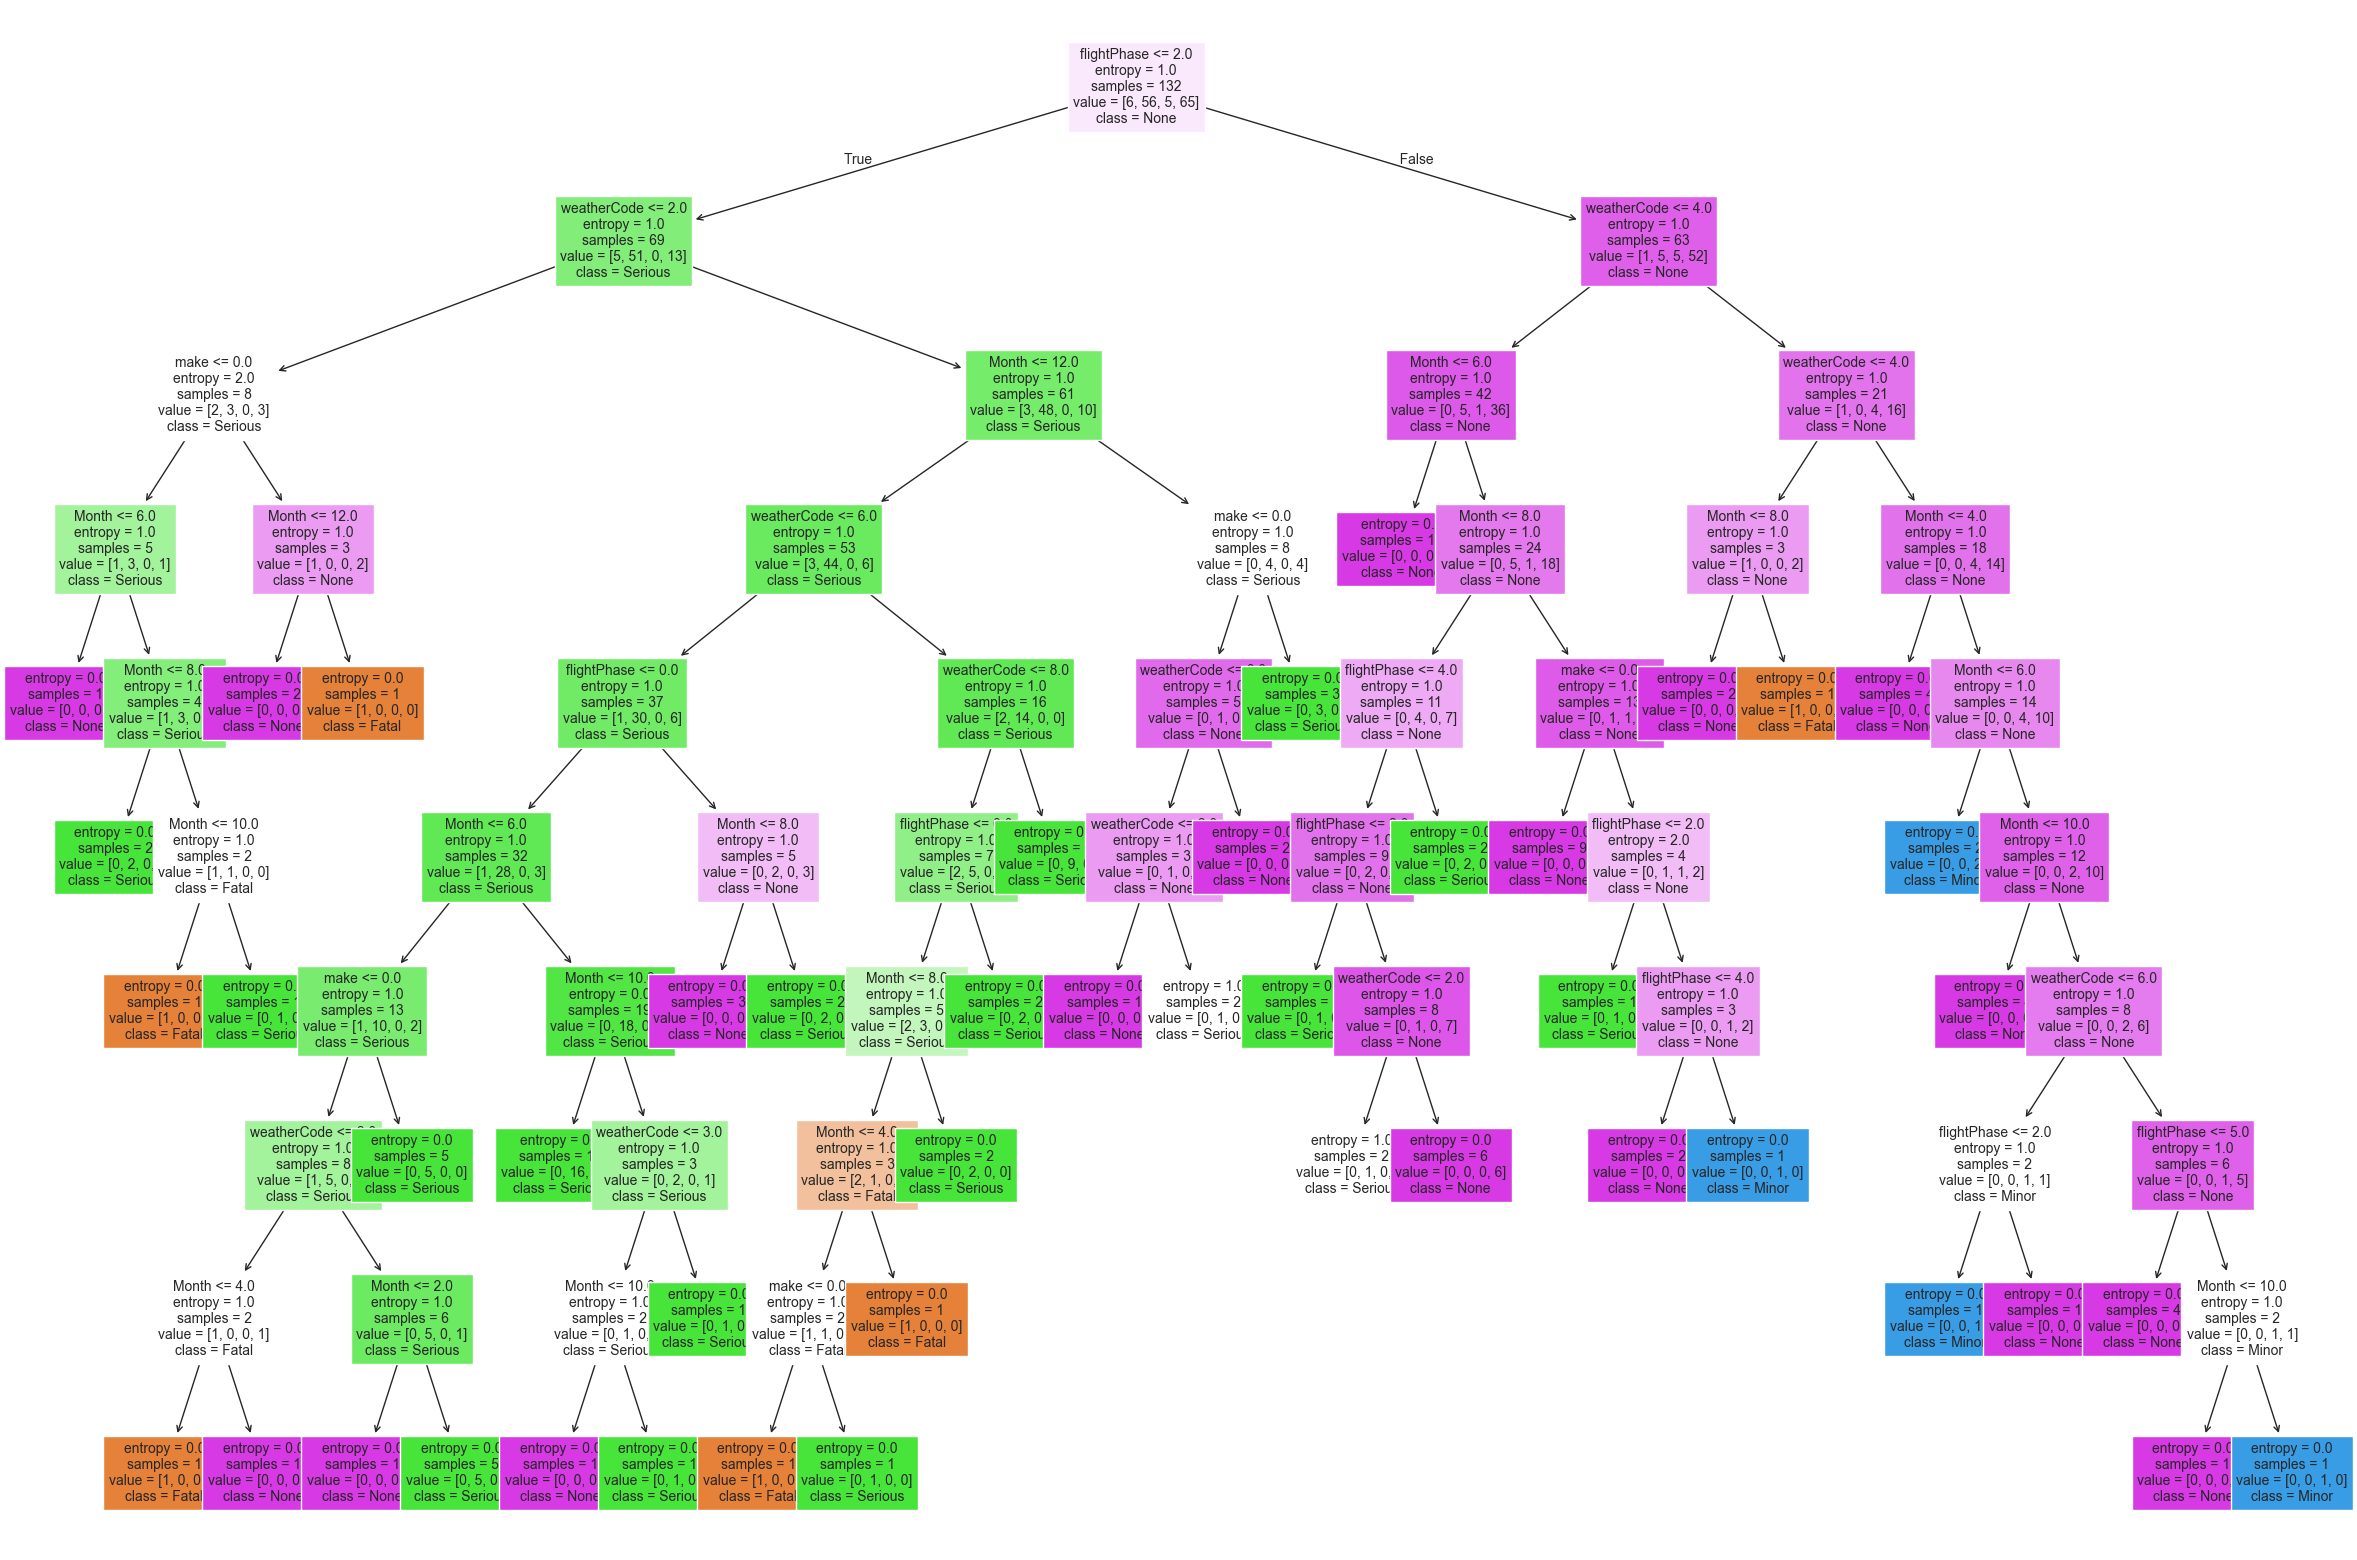

In [611]:
features = ['Month', 'weatherCode', 'flightPhase', 'make']
# features = ['BroadPhaseofFlight', 'Make', 'Month', 'weatherDescription']

X = df_weather[features]
# X = pd.get_dummies(df_weather[features])
y = df_weather['injuryLevel']

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))
tree.plot_tree(clf, feature_names=features, filled=True, precision=0, class_names=['Fatal','Serious','Minor','None'], fontsize=10)
# tree.plot_tree(clf, filled=True, precision=0, fontsize=10)
plt.show()

In [610]:
y_pred = clf.predict(X_test)

# evaluating our model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6590909090909091
Precision: 0.43181818181818177
Recall: 0.4734848484848485
f1_score: 0.4484848484848485


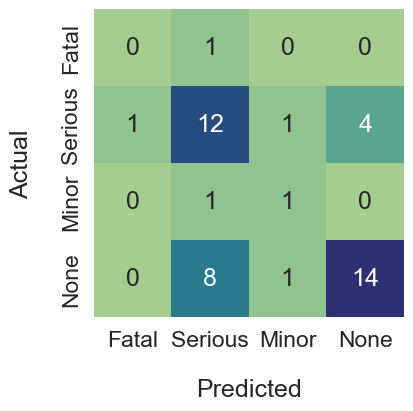

In [613]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
 
ax = sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cbar=False,
    cmap='crest',
    xticklabels=['Fatal','Serious','Minor','None'],
    yticklabels=['Fatal','Serious','Minor','None']
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

Some information on evalutation metrics:

"
For datasets with imbalanced classes, a model could achieve high Accuracy by predicting 
the majority class most of the time

F1 Score is defined as the harmonic mean of Precision and Recall. If any of them becomes
extremely low, F1 Score will also go down. Thus, F1 Score can help you find a good balance
between Precision and Recall.
"

In [597]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced' # handle imbalanced classes
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("f1_score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.6818181818181818
Precision: 0.3920454545454546
Recall: 0.3712121212121212
f1_score: 0.3810160427807487
